### Linear Regression

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [6]:
df = pd.DataFrame(housing.data,columns=housing.feature_names)
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [11]:
df['price']=housing.target
print(df.describe())
print(df.info())
print(df.head())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

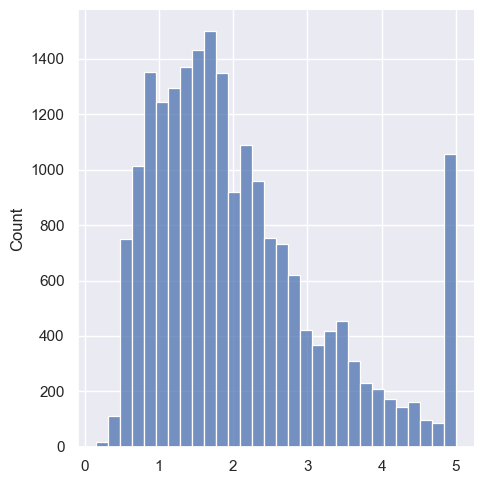

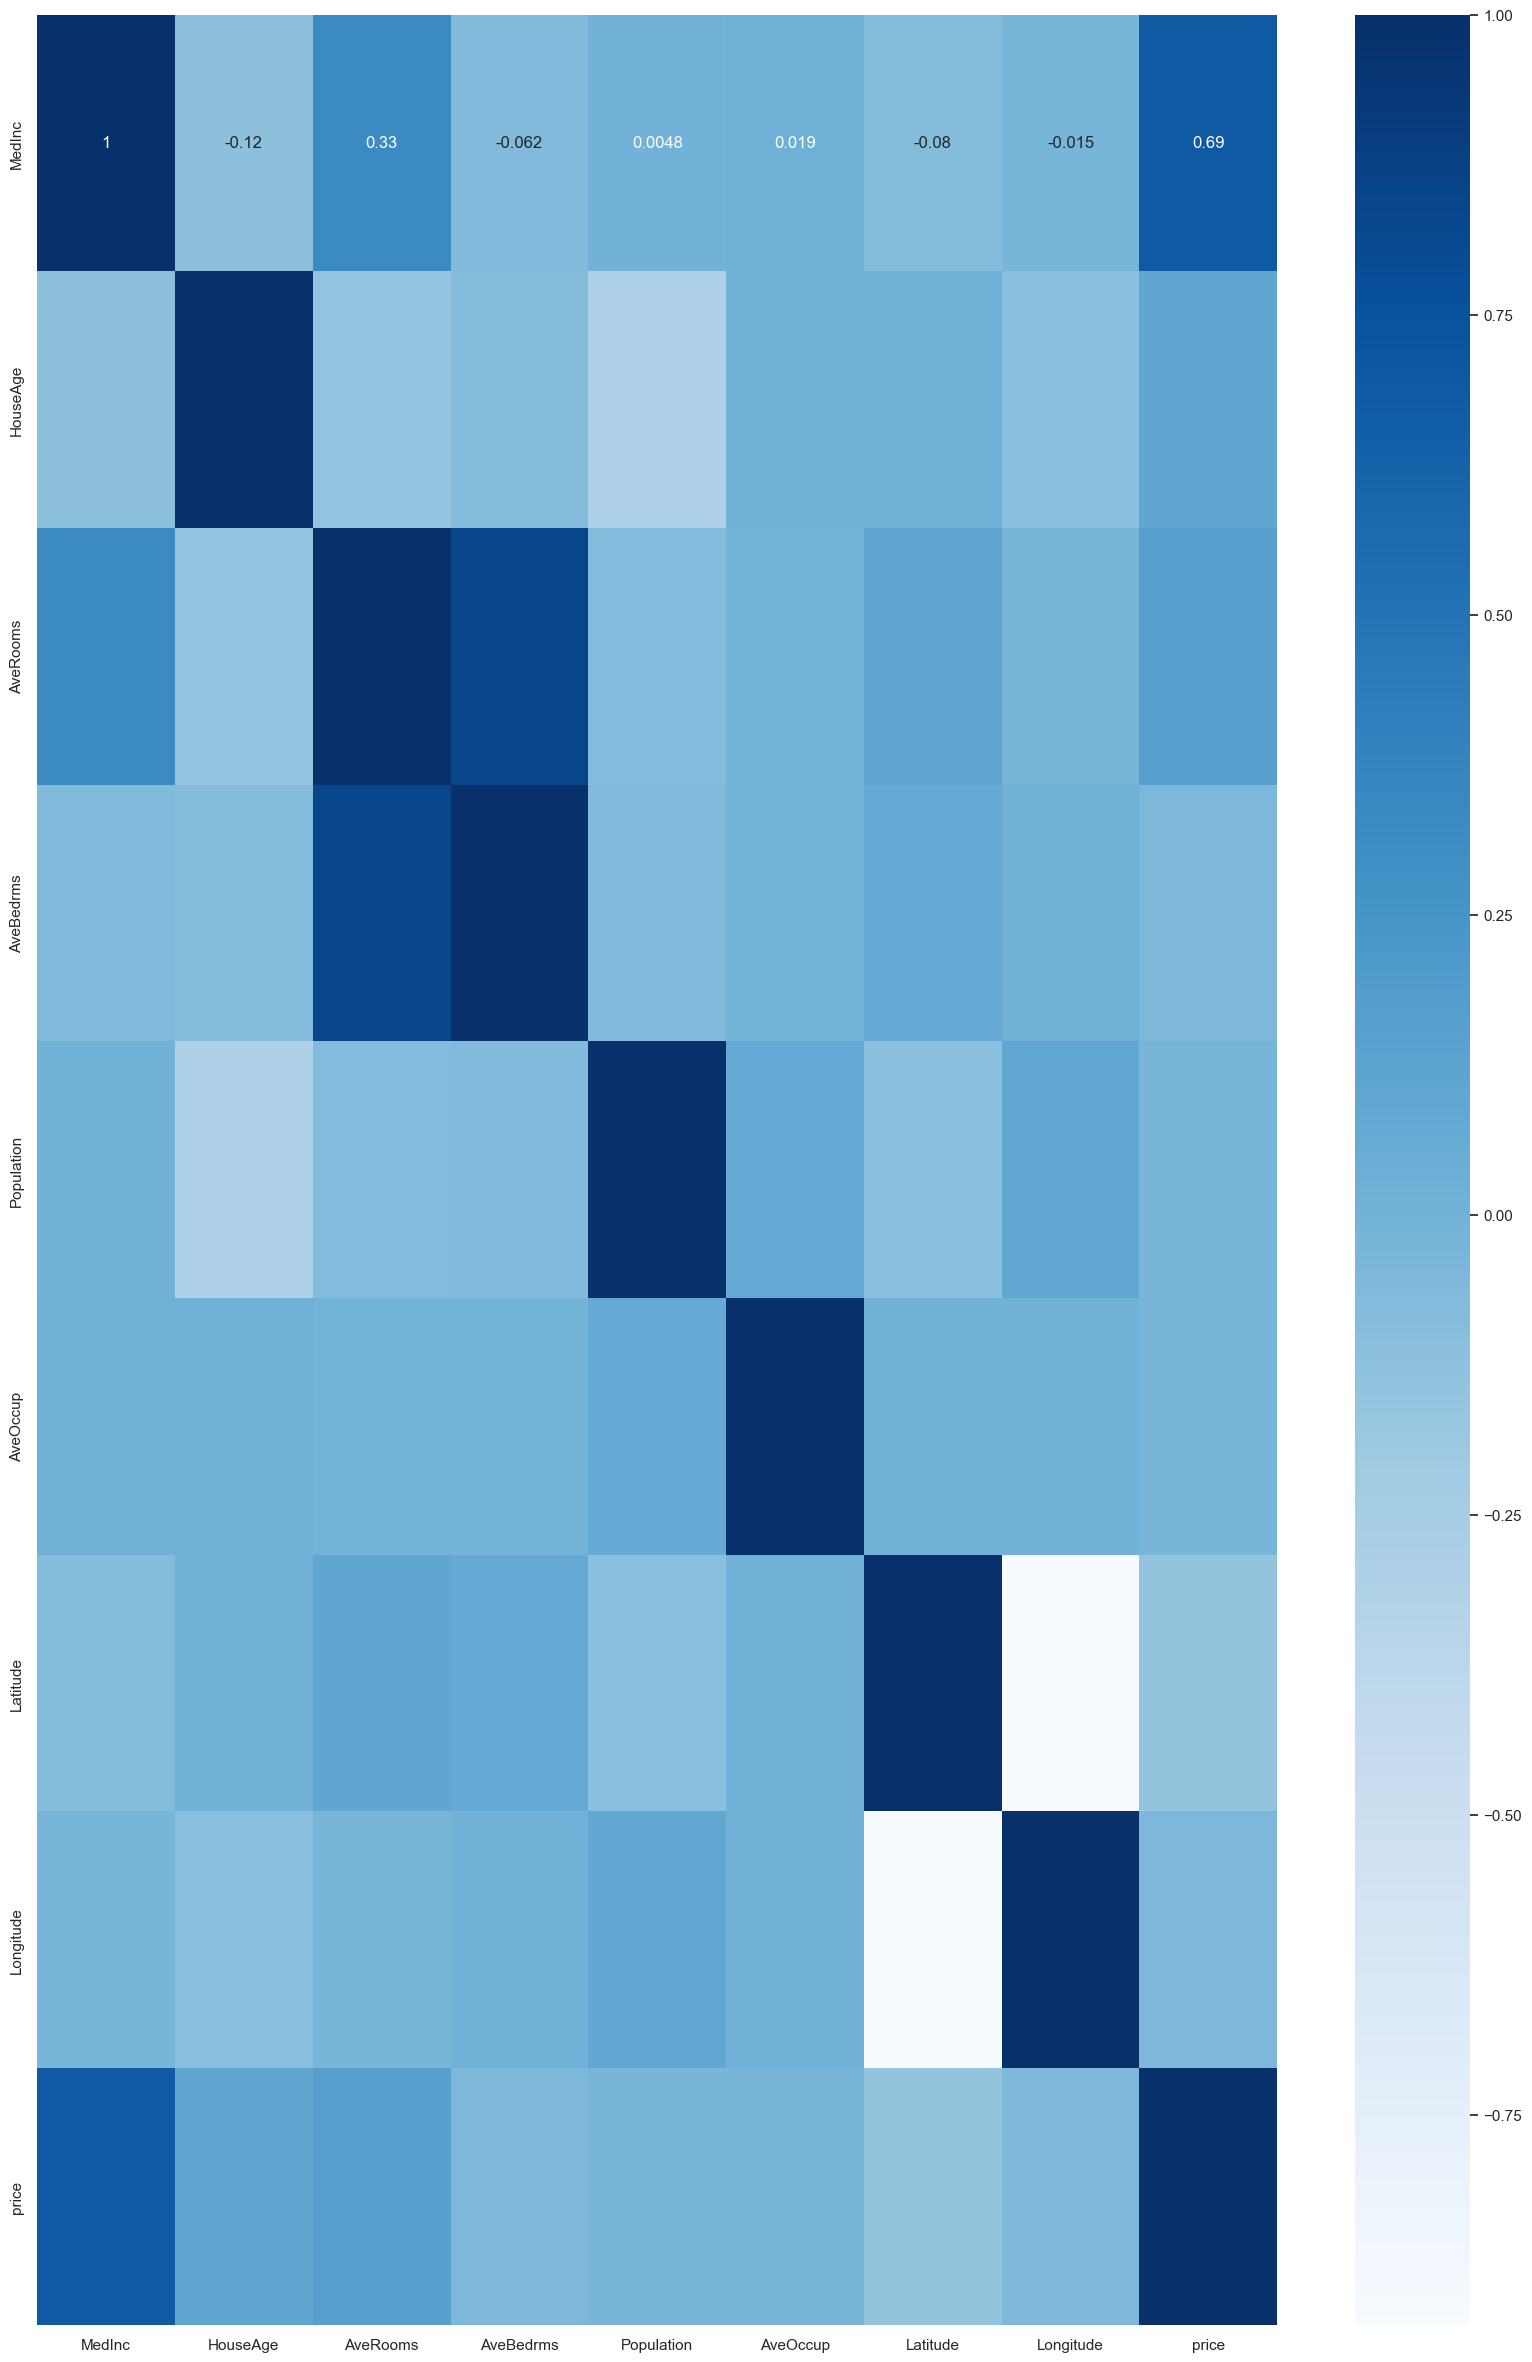

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,5)})
sns.displot(housing.target,bins=30)
plt.show()

corr=df.corr()
plt.figure(figsize=(20,30))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()


In [15]:
target=df['price'].values
features=df.drop(['price'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3)
print("training data length:",len(x_train))
print("test data length:",len(x_test))

training data length: 14448
test data length: 6192


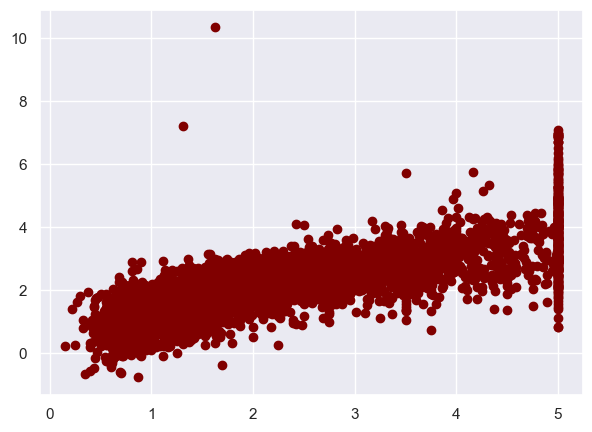

In [16]:
r=LinearRegression()
r.fit(x_train,y_train)
r.score(x_test,y_test)
y_pred=r.predict(x_test)


plt.scatter(y_test,y_pred,c="maroon")


In [18]:
lreg_coefficient=pd.DataFrame()
lreg_coefficient["Columns"]=housing.feature_names
lreg_coefficient["Coefficient_estimate"]=pd.Series(r.coef_)

print('\n Coefficient estimate by Linear Model \n',lreg_coefficient)
print('\n Intercept',r.intercept_)

print('\n\n\n Mean Squared error:  ',mean_squared_error(y_test,y_pred))
print('\n R2 Score: ',r2_score(y_test,y_pred))
print('\n Root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_pred)))



 Coefficient estimate by Linear Model 
       Columns  Coefficient_estimate
0      MedInc          4.445553e-01
1    HouseAge          9.984739e-03
2    AveRooms         -1.191071e-01
3   AveBedrms          7.316591e-01
4  Population          6.254408e-07
5    AveOccup         -3.366459e-03
6    Latitude         -4.157635e-01
7   Longitude         -4.295112e-01

 Intercept -36.62761524089191



 Mean Squared error:   0.5270833820828754

 R2 Score:  0.608252356565044

 Root mean squared error:  0.7260050840613139


#### Thank you ! :)